<a href="https://colab.research.google.com/github/Chanikya5793/Camouflage-detection/blob/main/kaggle_code_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update && apt-get install -y python3-opencv
!pip install scikit-learn scipy matplotlib
!pip install -q tensorflow-addons
!pip install -q tensorflow-probability
!pip install -q opencv-python-headless
!pip install -q seaborn


!pip install -qU wandb
!pip install -qU scikit-learn

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-opencv is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
0 upgraded, 0 newly installed, 0 to remove and 209 not upgraded

In [ ]:
!sudo pip install --upgrade keras
!sudo pip install --upgrade tensorflow-addons

  Using cached keras-3.2.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.19.0
    Uninstalling tensorflow-addons-0.19.0:
      Successfully uninstalled tensorflow-addons-0.19.0


In [ ]:
!pip show tensorflow-addons
!pip install tensorflow
!pip show tensorflow-addons

Name: tensorflow-addons
Version: 0.23.0
Summary: TensorFlow Addons.
Home-page: UNKNOWN
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, typeguard
Required-by: 
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
Name: tensorflow-addons
Version: 0.23.0
Summary: TensorFlow Addons.
Home-page: UNKNOWN
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, typeguard
Required-by: 


In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
!python --version

Python 3.10.12


In [ ]:
import tensorflow as tf
!pip install tensorflow-addons
!pip install tensorflow-probability
!pip install tensorflow-datasets
import os
import tensorflow_datasets as tfds
#import tensorflow_addons as tfa
import tensorflow_probability as tfp

In [ ]:
def feature(image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image

In [ ]:
height = 512
width = 512
font_size = 20
def apply_visual_attention(path):
    img = cv2.imread(path, 0)
#     img = cv2.imread(path)
#     resized_img = cv2.resize(img, (height, width))
#     denoised_img = cv2.medianBlur(resized_img, 5)
#     th = cv2.adaptiveThreshold(denoised_img, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 11, C = 2)
    return img

In [ ]:
import os
import cv2
import numpy as np

# Set the path to the dataset folders
train_image_path = '/content/drive/MyDrive/dataset-splitM/Training/images/'
train_gt_path = '/content/drive/MyDrive/dataset-splitM/Training/GT/'
test_image_path = '/content/drive/MyDrive/dataset-splitM/Testing/images/'
test_gt_path = '/content/drive/MyDrive/dataset-splitM/Testing/GT/'

In [ ]:
img_size2=(512,512)


# Function to load images and ground truth instances
def load_data(image_path, gt_path,maxi):
    images = []
    gt_instances = []
    c=0
    for filename in sorted(os.listdir(image_path)):
        # Check if file is a JPG image
        c+=1
        if(c>=maxi):
            break
        if(c%50==0):
            print(c)
        if filename.endswith('.jpg'):
            # Load image and resize to (256,256)
#             img = cv2.imread(image_path + filename)
            img=apply_visual_attention(image_path + filename)
            img = cv2.resize(img, img_size2)
            images.append(img)
            # Load ground truth instance and resize to (256,256)
            gt = cv2.imread(gt_path + filename[:-4] + '.png', cv2.IMREAD_GRAYSCALE)
            gt = cv2.resize(gt, img_size2, interpolation=cv2.INTER_LINEAR)
            gt_instances.append(gt)
    return np.array(images), np.array(gt_instances)


In [ ]:
# Load training data
train_images, train_gt_instances = load_data(train_image_path, train_gt_path,6000)

# Load testing data
test_images, test_gt_instances = load_data(test_image_path, test_gt_path,2000)

print('done')

50
100
150
200
250
300
350
400
450
500
550
600
650
700
50
100
150
200
250
300
done


In [ ]:
strategy = tf.distribute.MirroredStrategy()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import backend
backend.clear_session()


def build_generator(input_shape):
    model = Sequential()
    # Encoder
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), input_shape=input_shape, padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    # Decoder
    model.add(Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', activation='sigmoid'))

    # Output
    model.add(Conv2D(1, (1, 1), activation='sigmoid'))

    return model



with strategy.scope():
    input_shape = (512,512,1)
    generator = build_generator(input_shape)

    # Define optimizer and loss function
    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

    # Compile the model
    generator.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.Precision()])

    generator.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 dropout (Dropout)           (None, 32, 32, 512)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 64, 64, 256)       1179904   
 anspose)                                                        
                                                        

In [ ]:
train_images[0].shape

(512, 512)

In [ ]:
train_gt_instances[0].shape

(512, 512)

In [ ]:
len(train_images)

748

In [ ]:
num_epochs = 100
batch_size = 64

# Train the model
history = generator.fit(train_images, train_gt_instances,epochs=num_epochs,batch_size=batch_size,validation_data=(test_images, test_gt_instances))

Epoch 1/100
12/12 [==============================] - 22s 2s/step - loss: 146114.8438 - accuracy: 0.0223 - precision: 0.2299 - val_loss: 161933.6719 - val_accuracy: 0.0336 - val_precision: 0.2578
Epoch 2/100
12/12 [==============================] - 19s 2s/step - loss: 145661.7188 - accuracy: 0.1892 - precision: 0.2540 - val_loss: 161442.5156 - val_accuracy: 0.3039 - val_precision: 0.3077
Epoch 3/100
12/12 [==============================] - 19s 2s/step - loss: 145469.6250 - accuracy: 0.4072 - precision: 0.2855 - val_loss: 161176.9688 - val_accuracy: 0.3913 - val_precision: 0.3313
Epoch 4/100
12/12 [==============================] - 18s 2s/step - loss: 145031.6562 - accuracy: 0.3321 - precision: 0.2817 - val_loss: 160830.7500 - val_accuracy: 0.4840 - val_precision: 0.3568
Epoch 5/100
12/12 [==============================] - 18s 2s/step - loss: 144828.4219 - accuracy: 0.4167 - precision: 0.3027 - val_loss: 160780.8750 - val_accuracy: 0.4064 - val_precision: 0.3355
Epoch 6/100
12/12 [======

In [ ]:
generator.compile(optimizer='adam', loss='binary_crossentropy')

(1, 512, 512)
1/1 [==============================] - 0s 92ms/step


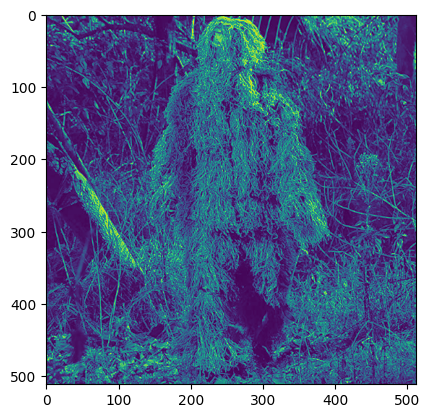

In [ ]:
import matplotlib.pyplot as plt
img_path='/content/drive/MyDrive/dataset-splitM/Training/images/image5.jpg'
otimg = cv2.imread(img_path)
otimg=apply_visual_attention(img_path)
timg = cv2.resize(otimg, img_size2)


plt.imshow(timg)

timg=np.array([timg])
print(timg.shape)
predictions = generator.predict(timg)

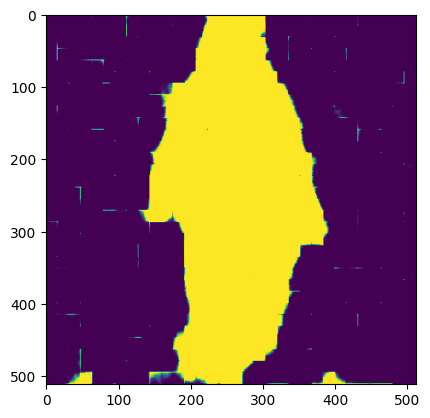

In [ ]:
plt.imshow(predictions[0])

/content/drive/MyDrive/dataset-splitM/Training/GT/image5.png


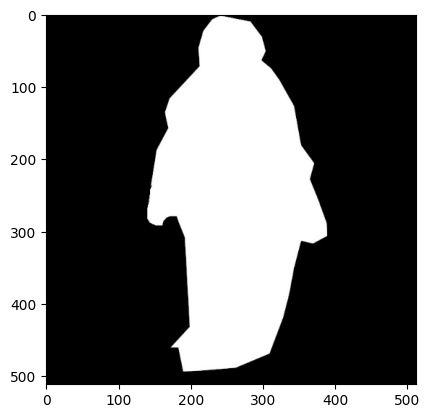

In [ ]:
timg= img_path.split('/')

timgp=timg.pop().split('.')
timgp=[timgp[0],'png']
timgp=".".join(timgp)
timg[6]='GT'

timg=timg+[timgp]
timg='/'.join(timg)
print(timg)
timg = cv2.resize(cv2.imread(timg), img_size2)
# timg=feature(timg)
plt.imshow(timg)

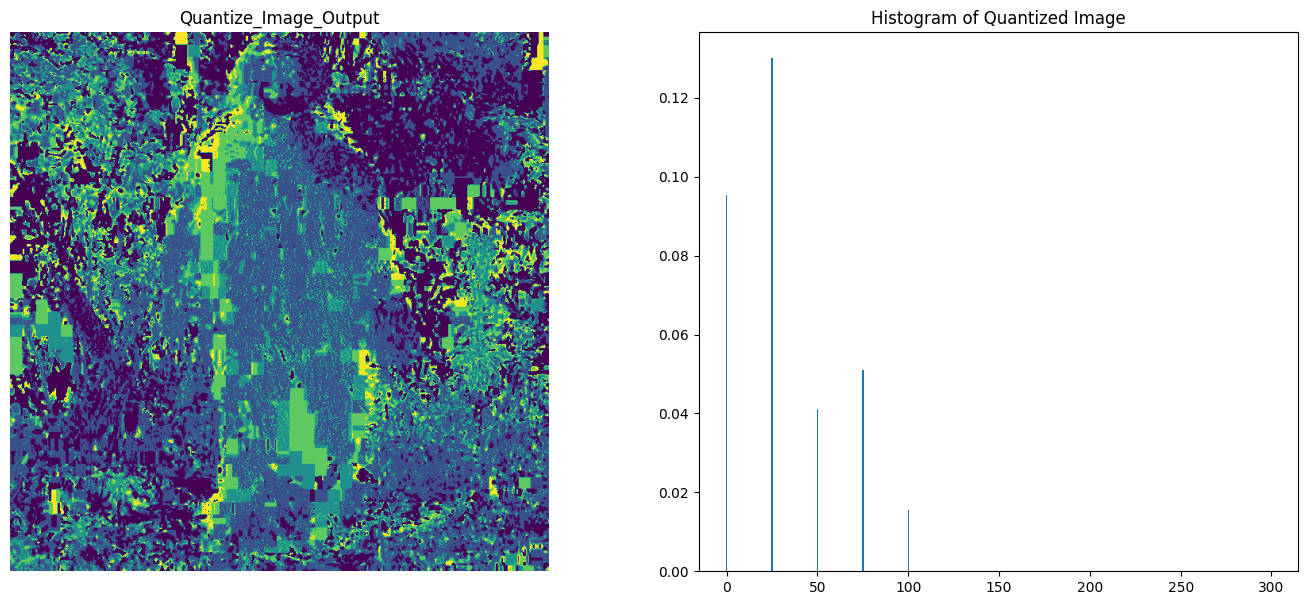

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(17, 7))

# define interval ranges for hue, saturation, and lightness
hue_ranges = [(0, 270), (20, 45), (45, 55), (55, 80), (80, 100), (100, 120),
              (120, 140), (140, 165), (165, 190), (190, 220), (220, 255), (255, 270)]
sat_ranges = [(0.0, 0.1), (0.1, 0.25), (0.25, 0.45), (0.45, 0.65), (0.65, 0.85), (0.85, 1)]
val_ranges = [(0.0, 0.15), (0.15, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]

# define function to quantize HSV image based on interval ranges
def quantize_hsv(img):
    # convert image to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # quantize hue, saturation, and lightness separately
    h, s, v = cv2.split(hsv_img)
    h_quantized = np.zeros_like(h)
    s_quantized = np.zeros_like(s)
    v_quantized = np.zeros_like(v)
    for i, (h_range, s_range, v_range) in enumerate(zip(hue_ranges, sat_ranges, val_ranges)):
        h_quantized[((h >= h_range[0]) & (h < h_range[1]))] = i
        s_quantized[((s >= s_range[0]) & (s < s_range[1]))] = i
        v_quantized[((v >= v_range[0]) & (v < v_range[1]))] = i
    # combine quantized hue, saturation, and lightness to form Q
    Q = 25 * h_quantized + 5 * s_quantized + v_quantized
    return Q

# define function to generate color histogram of an image
def color_histogram(img):
    # quantize image using HSV color space
    Q = quantize_hsv(img)

    # showing image
    fig.add_subplot(1, 2, 1)
    plt.imshow(Q)
    plt.axis('off')
    plt.title("Quantize_Image_Output")

    # compute color histogram of quantized image
    hist, _ = np.histogram(Q.ravel(), bins=range(301))
    # normalize histogram
    hist = hist.astype(float) / float(img.size)
    return hist

# load input image
img = cv2.imread('/content/drive/MyDrive/dataset-splitM/Training/images/image5.jpg')

# generate color histogram of input image
hist = color_histogram(img)

Q = quantize_hsv(img)

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
# plot histogram
plt.bar(range(300), hist)
plt.title("Histogram of Quantized Image")
plt.show()

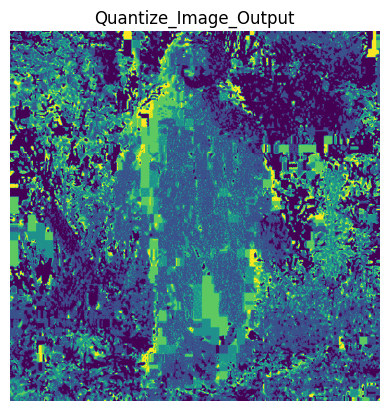

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset-splitM/Training/images/image5.jpg')
hist = color_histogram(img)

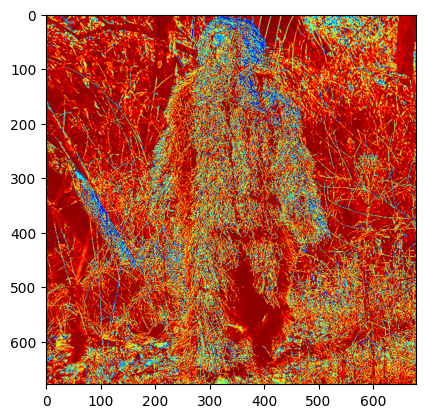

In [ ]:
import cv2
import numpy as np

# define the increment function of lightness visual attention
def fv(v, kv=1.0):
    return kv * v**0.6

# define the increment function of hue visual attention
def fh(h):
    if np.mod(h, np.pi/3) == 0:
        return 1
    else:
        return np.cos(np.mod(h, np.pi/3) - (np.pi/6)) / np.cos(np.pi/6)

# define the increment function of chroma visual attention
def fc(h, s, v, kv=1.0, kc=1.0):
    return kv * fv(v, kv) * fh(h) * s**0.6 * kc

# define the function of color visual attention
def f(h, s, v, kv=1.0, kc=1.0):
    return 1 + fv(v, kv) + fc(h, s, v, kv, kc)


# convert the image to HSV color space
hsv_img = img

# initialize an empty matrix for the color visual attention map
cva_map = np.zeros_like(hsv_img[:, :, 0], dtype=float)

# iterate over each pixel in the image and calculate its color visual attention
for i in range(hsv_img.shape[0]):
    for j in range(hsv_img.shape[1]):
        h, s, v = hsv_img[i, j]
        cva = f(h, s, v)
        cva_map[i, j] = cva

# normalize the color visual attention map to the range [0, 255]
cva_map = cv2.normalize(cva_map, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# display the color visual attention map
plt.imshow(cv2.applyColorMap(cva_map, cv2.COLORMAP_JET))

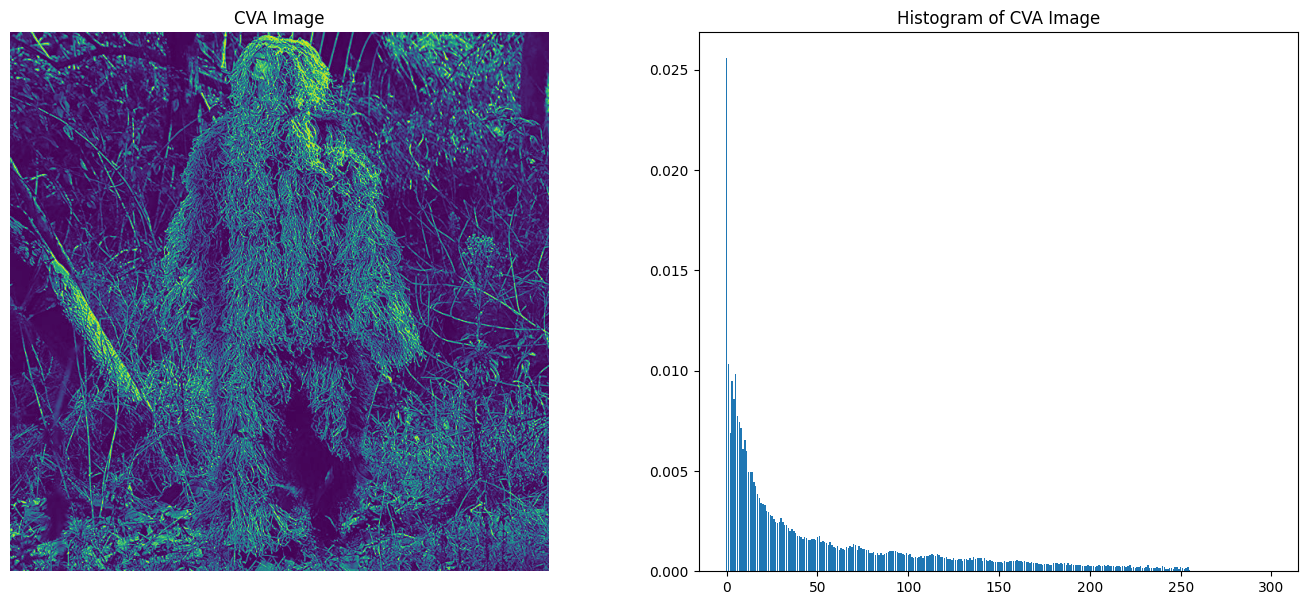

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17, 7))


# define function to generate color histogram of an image
def color_histogram_percp(img):
    # showing image
    fig.add_subplot(1, 2, 1)
    plt.imshow(cva_map)
    plt.axis('off')
    plt.title("CVA Image")

    # compute color histogram of quantized image
    hist, _ = np.histogram(cva_map.ravel(), bins=range(301))
    # normalize histogram
    hist = hist.astype(float) / float(img.size)
    return hist

hist2 = color_histogram_percp(img)

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
# plot histogram
plt.bar(range(300), hist2)
plt.title("Histogram of CVA Image")
plt.show()

In [ ]:
color_hist = visual_attention.reshape(-1) * color_hist

NameError: name 'visual_attention' is not defined

In [ ]:
import cv2
import numpy as np

def calculate_color_feature(image, mask):
    # convert the image to the HSV color space
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # define the visual attention function
    def f(h, s, v):
        return np.exp(-(h / 16)**2) * np.exp(-(s / 255)**2) * np.exp(-(v / 255)**2)
    # calculate the color histogram
    color_hist = np.zeros((32768))
    visual_attention = np.zeros((128, 16, 16))
    for i in range(0, 256, 8):
        for j in range(0, 256, 8):
            for k in range(0, 256, 8):
                h, s, v = cv2.split(cv2.merge([np.array([i]), np.array([j]), np.array([k])]))
                ci = i * 25 + j * 5 + k
                visual_attention[ci // 256, (ci % 256) // 16, ci % 16] = f(i, j, k)
    # normalize the color histogram based on visual perception
    visual_attention = visual_attention / visual_attention.sum()
    color_hist = visual_attention.reshape(-1) * color_hist
    # calculate the color feature of the region Dk
    h = np.sum(color_hist * hsv_img[:, :, 0][mask]) / np.sum(color_hist)
    s = np.sum(color_hist * hsv_img[:, :, 1][mask]) / np.sum(color_hist)
    v = np.sum(color_hist * hsv_img[:, :, 2][mask]) / np.sum(color_hist)
    return (h, s, v)



# create the mask for the region Dk
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
mask[100:200, 100:200] = 255

# calculate the color feature of the region Dk
color_feature = calculate_color_feature(img, mask)

# display the color feature
print("Color feature:", color_feature)

IndexError: index 128 is out of bounds for axis 0 with size 128

In [ ]:
import cv2
import numpy as np

def calculate_color_feature(image, mask):
    # Convert the image to the HSV color space
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the visual attention function
    def f(h, s, v):
        return np.exp(-(h / 16)**2) * np.exp(-(s / 255)**2) * np.exp(-(v / 255)**2)

    # Calculate the color histogram
    color_hist = np.zeros((10000))  # Resize color_hist to match masked_hsv
    visual_attention = np.zeros((128, 128, 128))
    for i in range(0, 256, 2):
        for j in range(0, 256, 2):
            for k in range(0, 256, 2):
                ci = (i // 2) * 4096 + (j // 2) * 64 + (k // 2)
                visual_attention[i // 2, j // 2, k // 2] = f(i, j, k)

    # Normalize the color histogram based on visual perception
    visual_attention = visual_attention / visual_attention.sum()

    # Reshape visual_attention to match the shape of color_hist
    visual_attention_flat = visual_attention.flatten()[:10000]  # Resize visual_attention_flat

    # Apply the mask to extract desired values
    masked_values = hsv_img[:, :, 0][mask > 0]

    # Flatten the result
    masked_hsv = masked_values.flatten()

    # Check for nan values in color_hist and masked_hsv
    if np.isnan(color_hist).any():
        print("color_hist contains nan values!")
    if np.isnan(masked_hsv).any():
        print("masked_hsv contains nan values!")

    # Handle division by zero by checking if sum is zero
    sum_color_hist = np.sum(visual_attention_flat)
    if sum_color_hist == 0:
        # Return default values or handle the situation appropriately
        return (0, 0, 0)

    # Calculate the color feature of the region Dk
    h = np.sum(visual_attention_flat * masked_hsv) / sum_color_hist
    s = np.sum(visual_attention_flat * hsv_img[:, :, 1][mask > 0].flatten()) / sum_color_hist
    v = np.sum(visual_attention_flat * hsv_img[:, :, 2][mask > 0].flatten()) / sum_color_hist

    return (h, s, v)

# Rest of the code remains the same...




# create the mask for the region Dk
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
mask[100:200, 100:200] = 255

# calculate the color feature of the region Dk
color_feature = calculate_color_feature(img, mask)

# display the color feature
print("Color feature:", color_feature)

Color feature: (62.8582862999582, 143.2588326637771, 45.032638156495466)


<Figure size 1700x700 with 0 Axes>

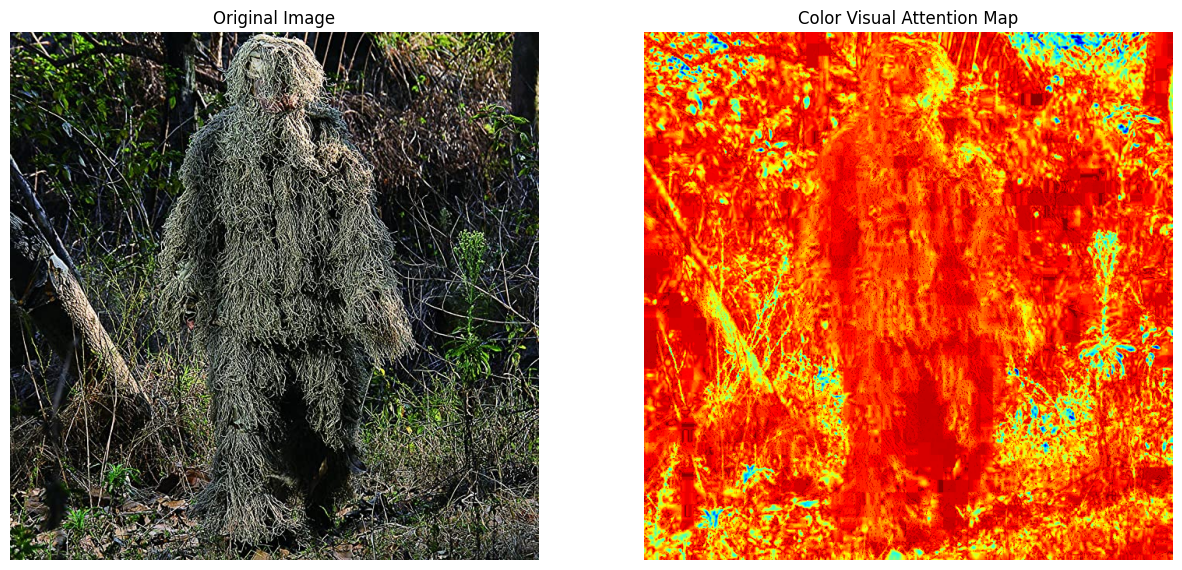

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17, 7))

# define interval ranges for hue, saturation, and lightness
hue_ranges = [(0, 270), (20, 45), (45, 55), (55, 80), (80, 100), (100, 120),
              (120, 140), (140, 165), (165, 190), (190, 220), (220, 255), (255, 270)]
sat_ranges = [(0.0, 0.1), (0.1, 0.25), (0.25, 0.45), (0.45, 0.65), (0.65, 0.85), (0.85, 1)]
val_ranges = [(0.0, 0.15), (0.15, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]

# define function to quantize HSV image based on interval ranges
def quantize_hsv(img):
    # convert image to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # quantize hue, saturation, and lightness separately
    h, s, v = cv2.split(hsv_img)
    h_quantized = np.zeros_like(h)
    s_quantized = np.zeros_like(s)
    v_quantized = np.zeros_like(v)
    for i, (h_range, s_range, v_range) in enumerate(zip(hue_ranges, sat_ranges, val_ranges)):
        h_quantized[((h >= h_range[0]) & (h < h_range[1]))] = i
        s_quantized[((s >= s_range[0]) & (s < s_range[1]))] = i
        v_quantized[((v >= v_range[0]) & (v < v_range[1]))] = i
    # combine quantized hue, saturation, and lightness to form Q
    Q = 25 * h_quantized + 5 * s_quantized + v_quantized
    return Q, hsv_img

# define function to generate color histogram of an image
def color_histogram(img):
    # quantize image using HSV color space
    Q, _ = quantize_hsv(img)

    # showing image
    fig.add_subplot(1, 2, 1)
    plt.imshow(Q)
    plt.axis('off')
    plt.title("Quantize_Image_Output")

    # compute color histogram of quantized image
    hist, _ = np.histogram(Q.ravel(), bins=range(301))
    # normalize histogram
    hist = hist.astype(float) / float(img.size)
    return hist

# define the increment function of lightness visual attention
def fv(v, kv=1.0):
    return kv * v**0.6

# define the increment function of hue visual attention
def fh(h):
    if np.mod(h, np.pi/3) == 0:
        return 1
    else:
        return np.cos(np.mod(h, np.pi/3) - (np.pi/6)) / np.cos(np.pi/6)

# define the increment function of chroma visual attention
def fc(h, s, v, kv=1.0, kc=1.0):
    return kv * fv(v, kv) * fh(h) * s**0.6 * kc
#define the function of color visual attention
def f(h, s, v, kv=1.0, kc=1.0):
  return 1 + fv(v, kv) + fc(h, s, v, kv, kc)

#convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#initialize an empty matrix for the color visual attention map
cva_map = np.zeros_like(hsv_img[:, :, 0], dtype=float)

#iterate over each pixel in the image and calculate its color visual attention
for i in range(hsv_img.shape[0]):
  for j in range(hsv_img.shape[1]):
    h, s, v = hsv_img[i, j]
    cva = f(h, s, v)
    cva_map[i, j] = cva

#normalize the color visual attention map to the range [0, 255]
cva_map = cv2.normalize(cva_map, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#display the original image and the color visual attention map
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(cv2.applyColorMap(cva_map, cv2.COLORMAP_JET))
ax2.set_title('Color Visual Attention Map')
ax2.axis('off')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
from PIL import Image


def load_mask( image_path):
    # Load the original image
    img = Image.open(image_path)

    # Resize the image to the same shape as the input images
    img = img.resize((512,512), resample=Image.BILINEAR)

    # Convert the image to grayscale and then to a binary mask
    img = img.convert('L')
    img = np.array(img)
    img[img > 0] = 1
    img = np.expand_dims(img, axis=-1)

    return img


with strategy.scope():
    .trainable = False
    img_width, img_height = 512, 512
    input_shape = (img_width, img_height, 3)
    # Add a custom head on top of the base model for fine-tuning
    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.Dropout(0.5)(x)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)

    # Compile the model with binary cross-entropy loss and Adam optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model on the train data
    model.fit(train_generator, epochs=epochs, validation_data=test_generator)
    model.summary()

history = model.fit(train_images, train_gt_instances,
                        epochs=10,
                        batch_size=32,
                        validation_data=(test_images, test_gt_instances),
                       )

NameError: name 'base_model' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # Dynamic resizing
    preprocessing_function=lambda img: tf.image.resize(img, (150, 150)))
train_generator = train_datagen.flow_from_directory(
        train_image_path,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

# Define ImageDataGenerator for test data
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # Dynamic resizing
    preprocessing_function=lambda img: tf.image.resize(img, (150, 150)))# Only rescaling for test data

test_generator = test_datagen.flow_from_directory(
        test_image_path,
        target_size=(150,150),  # Use the same target size as training data
        batch_size=32,
        class_mode='binary')

print(len(train_generator))
print(len(test_generator))

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Freeze the weights of the base model
base_model.trainable = False

# Add a custom head on top of the base model for fine-tuning
inputs = tf.keras.Input(shape=(512, 512, 3))
x = base_model(inputs, training=False)
x = layers.Dropout(0.5)(x)
outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the train data
model.fit(train_generator, epochs=50, validation_data=test_generator)
model.summary()


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
0
0


ValueError: Asked to retrieve element 0, but the Sequence has length 0